In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt

RefL0100N1504
AGNdT9L0050N0752
RecalL0025N0752


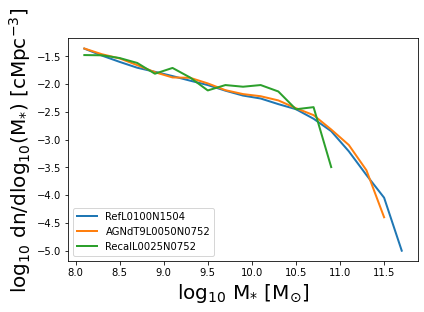

In [3]:
# Multiple Simulations

# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("vwg533", password = "FZtn087h")

# Array of chosen simulations. Entries refer to the simulation name and comoving box length.
mySims = np.array([('RefL0100N1504', 100.), ('AGNdT9L0050N0752', 50.), ('RecalL0025N0752', 25.)])

for sim_name, sim_size in mySims:

        print(sim_name)
    
	# Construct and execute query for each simulation. This query returns the number of galaxies 
	# for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
        myQuery = "SELECT \
                        0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 as mass, \
                        count(*) as num \
                   FROM \
                        %s_SubHalo as SH, \
                        %s_Aperture as AP \
                   WHERE \
                        SH.GalaxyID = AP.GalaxyID and \
                        AP.ApertureSize =  30 and \
                        AP.Mass_Star > 1e8 and \
                        SH.SnapNum = 27 \
                   GROUP BY \
                        0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 \
                   ORDER BY \
                        mass"%(sim_name, sim_name)

        # Execute query.
        myData 	= sql.execute_query(con, myQuery)

        # Normalize by volume and bin width.
        hist = myData['num'][:] / float(sim_size)**3.
        hist = hist / 0.2

        plt.plot(myData['mass'], np.log10(hist), label=sim_name, linewidth=2)

# Label plot.
plt.xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=20)
plt.ylabel(r'log$_{10}$ dn/dlog$_{10}$(M$_{*}$) [cMpc$^{-3}$]', fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()

#plt.savefig('GSMF.png')
plt.close()

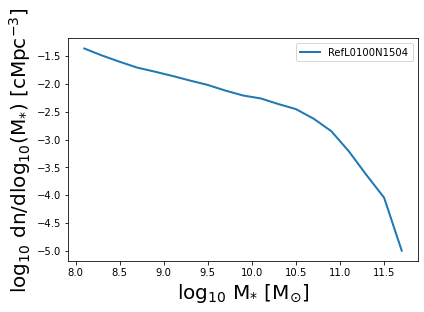

In [6]:
# Single simulation

# mySims = np.array([('RefL0100N1504', 100.), ('AGNdT9L0050N0752', 50.), ('RecalL0025N0752', 25.)])

# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("vwg533", password = "FZtn087h")

sim_name = 'RefL0100N1504'
sim_size = 100.
    
# Construct and execute query for each simulation. This query returns the number of galaxies 
# for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
myQuery = "SELECT \
                0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 as mass, \
                count(*) as num \
           FROM \
                %s_SubHalo as SH, \
                %s_Aperture as AP \
           WHERE \
                SH.GalaxyID = AP.GalaxyID and \
                AP.ApertureSize =  30 and \
                AP.Mass_Star > 1e8 and \
                SH.SnapNum = 27 \
           GROUP BY \
                0.1+floor(log10(AP.Mass_Star)/0.2)*0.2 \
           ORDER BY \
                mass"%(sim_name, sim_name)

# Execute query.
myData 	= sql.execute_query(con, myQuery)

# Normalize by volume and bin width.
hist = myData['num'][:] / float(sim_size)**3.
hist = hist / 0.2

plt.plot(myData['mass'], np.log10(hist), label=sim_name, linewidth=2)

# Label plot.
plt.xlabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=20)
plt.ylabel(r'log$_{10}$ dn/dlog$_{10}$(M$_{*}$) [cMpc$^{-3}$]', fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()

#plt.savefig('GSMF.png')
plt.close()

RefL0100N1504
AGNdT9L0050N0752
RecalL0025N0752


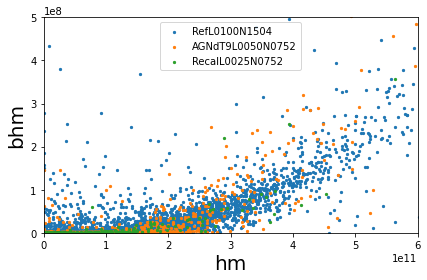

In [9]:
# Multiple Simulations, different variables

# This uses the eagleSqlTools module to connect to the database with your username and password.
# If the password is not given, the module will prompt for it.
con = sql.connect("vwg533", password = "FZtn087h")

# Array of chosen simulations. Entries refer to the simulation name and comoving box length.
mySims = np.array([('RefL0100N1504', 100.), ('AGNdT9L0050N0752', 50.), ('RecalL0025N0752', 25.)])

for sim_name, sim_size in mySims:

        print(sim_name)
    
        # Construct and execute query for each simulation. This query returns the number of galaxies 
        # for a given 30 pkpc aperture stellar mass bin (centered with 0.2 dex width). 
        myQuery = "SELECT \
                    AP_Star.Mass_DM as hm, \
                    SH.BlackHoleMass as bhm \
                   FROM \
                    %s_Subhalo as SH, \
                    %s_Aperture as AP_Star \
                   WHERE \
                    SH.SnapNum = 27 \
                    and SH.GalaxyID = AP_Star.GalaxyID \
                    and AP_Star.ApertureSize = 30 \
                    and AP_Star.Mass_DM > 0 \
                    and SH.BlackHoleMass > 0"%(sim_name, sim_name)

        # Execute query.
        myData 	= sql.execute_query(con, myQuery)
        
        plt.scatter(myData['hm'], myData['bhm'], label=sim_name, s=5)

# Label plot.
plt.xlabel('hm', fontsize=20)
plt.ylabel('bhm', fontsize=20)
plt.tight_layout()
plt.xlim(0, 6*10**11)
plt.ylim(0, 5*10**8)
plt.legend()
plt.show()

#plt.savefig('GSMF.png')
plt.close()